# Procesamiento de datos
Fecha:
Clase: 11



## Indice

1. Pandas <br>
2. Tipos de variables <br>
3. Funciones lambda y método apply <br>
4. Intro a estadistica <br>
4.1. Medidas de tendencia central <br>
4.2. Cuartiles y percentiles <br>
4.3. Medidas de dispersion <br>
4.4. Correlación <br>
5. Distribuciones de probabilidad <br>
5.1. Distribución normal <br>
5.2. visualizacion de distribuciones <br>
5.3. Función de densidad <br>
5.4. Diagrama de cajas <br>
5.5. Distribuciones simetricas y asimetricas <br>

6. Valores faltantes 

6. Encoding - Codificación <br>

7. Tranasformación de variables <br>
7.1. Escalado <br>
7.2. Estandarizado <br>

8. Outliers <br>
8.1. Tipos de outliers <br>
8.2. Causas típicas <br>
8.3. Detección de outliers <br>
8.4. Tratamiento de outliers <br>

9. Train-test split, cross-validation and pipelines <br>

10. Procesamiento de textos <br>

# Pandas


**Pandas es una librería de código abierto de Python para la manipulación y el análisis de datos**. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. Su nombre viene de "PANel DAta"

Pandas **Dataframe: Conjunto de datos tabulados en dos dimensiones** en el cual se puede guardar datos de distintos tipos (caractéres, enteros, valores de punto flotante,etc.). Es similar a una hoja de cálculo o una tabla de SQL.

Pandas Series: Es un array 1D capaz de contener cualquier tipo de datos. Una Serie representa una columna, que puede ser independiente o pertenecer a un Pandas Dataframe.


### Datos básicos de un dataframe

Una vez que hemos creado o leído un dataset en un DataFrame, es el momento de comenzar a obtener datos sobre ellos.
Para ello, podemos usar una serie de operaciones que nos permiten obtener valores importantes. Por ejemplo:

- **df.shape** Número de filas y columnas de un DataFrame. 
- **df.index** Descripción del índice de filas del DataFrame. 
- **df.columns** Descripción de las columnas del DataFrame. 
- **df.info()** Información general sobre el DataFrame. 
- **df.count()** Cuenta el número de valores no nulos del DataFrame. 
- **df.head(n=5)** Muestra las n primeras filas del DataFrame, por defecto 5. 
- **df.tail(n=5)** Muestra las n últimas filas del DataFrame, por defecto 5.

In [4]:
### Lineas de código favoritas ### 

# Importar pandas
import pandas as pd

# Cargarmos un dataset
df = pd.read_csv('iris.csv')

# Mostrar algunas lineas de nuestro DataFrame
df.head(13)
df.tail(4)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Como de grande es una dataframe
df.shape

(150, 6)

In [6]:
# Sacar los valores únicos de una columna
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

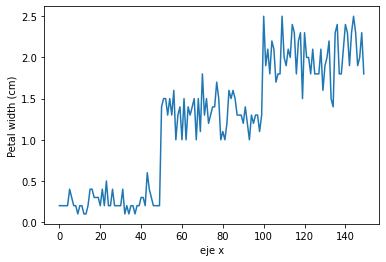

In [7]:
import matplotlib.pyplot as plt

df['PetalWidthCm'].plot()
plt.ylabel('Petal width (cm)')
plt.xlabel('eje x')
plt.show()


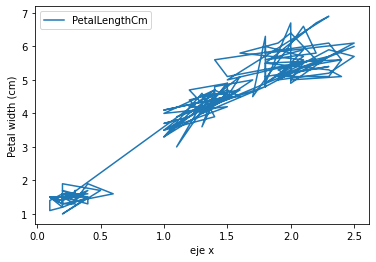

In [11]:
df.plot(x='PetalWidthCm', y = 'PetalLengthCm')
plt.ylabel('Petal width (cm)')
plt.xlabel('eje x')
plt.show()

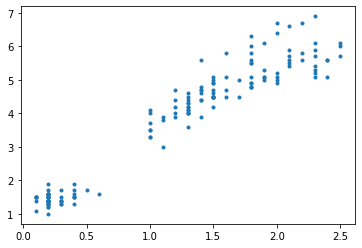

In [12]:
plt.scatter(df['PetalWidthCm'], df['PetalLengthCm'], marker ='.')

### Funciones de acceso

- **df.loc** Acceso por etiqueta, siendo la etiqueta el índice (fila o columna). 
- **df.iloc** Acceso por posición entera. 

Diferencias y similitudes:
- iloc y loc pueden seleccionar multiples files y/o columnas. Potencialmente para hacer vectorizaciones.
- iat y at solo pueden acceder a valores escalares. Es decir, no valen para hacer slicings. Son la versión rápida de iloc y loc.

# Tipos de variable:

#### Variables numericas:
**Variables Discretas**: <br>
Son también llamadas discontinuas, y están asociadas a conteos o enumeraciones, razón por la cual, solo permiten ser registradas con números enteros (0,1,2,3, etc.)<br>
**Variables Continuas**: <br>
Son aquellas características que son medidas dentro de un rango continuo infinito de valores numéricos y se registran con números reales. Pueden presentar cualquier valor dentro de cierto intervalo.<br>


#### Variables categoricas:
**Variable Nominal**: <br>
Es aquella variable cualitativa cuya categoría no sigue ningún orden, se agrupa sin ninguna jerarquía entre sí.<br>
**Variable Ordinal**:<br>
Son aquellas variables categóricas con orden secuencial o progresión natural esperable o jerarquía.

# Funciones lambda

Las expresiones lambda, también llamadas funciones anónimas, se usan cuando queremos hacer algo simple y y rápido en una linea en lugar de nombrar formalmente una función.

Son una forma corta de declarar funciones pequeñas y anónimas (no es necesario proporcionar un nombre para las funciones lambda) pero que se comportan como funciones normales declaradas con la palabra clave def. Haciendo esto, consigues escribir menos lineas de código, lo que puede ser especialmente útil cuando tienes que mantener programas grandes.

Es una manera adicional de definir funciones que nos será muy útil en el manejo de DataFrames.


# Método apply

Una **alternativa a usar loops para iterar sobre un DataFrame** es usar la función apply() de pandas.
El método apply nos permite transformar columnas de un DataFrame o crear columnas nuevas de una forma organizada y compacta.
Su funcionamiento consiste en aplicar una determinada función sobre la columna a crear o modificar. Esa función debe ser un argumento de apply.

La función a aplicar podrá ser definida por una función lambda que es posible que sólo se utilice en esa línea concreta de código.


In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df['SepalWidthM'] = df['SepalWidthCm'].apply(lambda x: x * 100)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalWidthM
0,1,5.1,3.5,1.4,0.2,Iris-setosa,350.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,300.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,320.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,310.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,360.0


# 4. Introducción a la estadística

## 4.1 Medidas de tendencia central: Media y mediana

La **media**, promedio o media aritmética es una medida de centralización de un conjunto de puntos. Para un conjunto de valores, la media se define como: <br>

<h1><center> $\hat x = \frac{1}{N} \Sigma_{i=1}^{N} x_i$ </center></h1>

La **mediana** es otra medida de centralización. Se calcula de forma que en el conjunto de puntos, ordenado de menor a mayor, el 50% de los puntos tienen valores inferiores al de la mediana y el 50% de los puntos tiene valores  superiores.

- Si el conjunto tiene un número impar de elementos: Se toma el valor del elemento central.
- Si el conjunto tiene un número par de elementos: Se toma la media de los dos elementos centrales.


La media y la mediana tienen propiedades diferentes. Una de las más significativas es que la media es sensible a valores extremos, mientras que **la mediana es mas robusta** frente a valores extremos.

In [15]:
# Media
df['PetalLengthCm'].mean()

3.758666666666666

In [16]:

#Mediana
df['PetalLengthCm'].median()

4.35

In [19]:

# Moda
df['PetalLengthCm'].mode()[0]

1.5

## 4.2 Cuartiles y percentiles

La mediana dividía el conjunto de datos en dos. Los cuartiles dividen el conjunto de datos en cuatro,
de forma que, en un conjunto de valores ordenados de menor a mayor:
- El primer cuartil se interpreta como la mediana de la primera mitad de los valores
- El segundo cuartil es la propia mediana del conjunto de valores
- El tercer cuartil se interpreta como la mediana de la segunda mitad de valores


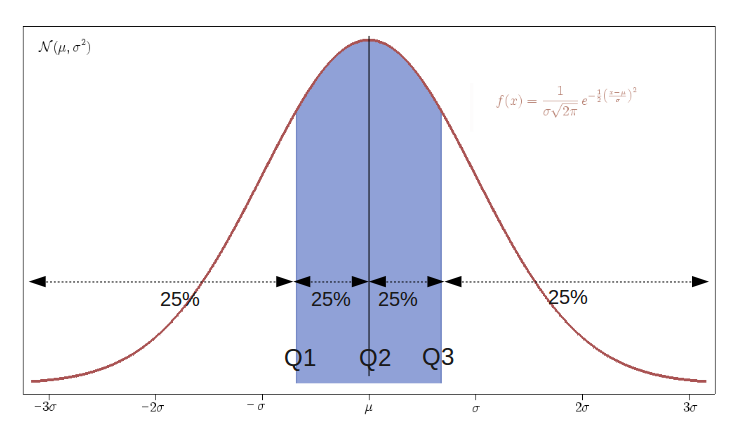


Los percentiles dividen el conjunto de datos, ordenados de menor a mayor, de forma que en cada uno de ellos haya un 1% de los datos totales. Tendremos las equivalencias:

- El percentil 25 es el primer cuartil.
- El percentil 50 es el segundo cuartil que, a su vez, es la mediana.
- El percentil 75 es el tercer cuartil.

In [22]:
# Primer cuantil: 
df['PetalLengthCm'].quantile(.25)

1.6

In [20]:
# Segundo cuantil o mediada:
df['PetalLengthCm'].quantile(.5)

4.35

In [21]:
# Tercer cuantil: 
df['PetalLengthCm'].quantile(.75)

5.1

## 4.3 Medidas de dispersión

De la misma forma que necesitamos medidas de centralización, definimos medidas de dispersión que nos den una idea de cuán separados están los datos en nuestra distribución.
Tres medidas fundamentales son la varianza, la desviación típica y el rango intercuartílico:
- La varianza se define como el promedio del cuadrado de la separación de cada punto de la distribución respecto a la media:

<h1><center>  $\sigma ^2 = \frac{1}{N} \Sigma_{i=1}^{N}(x_i - \hat x)^2 $ </center></h1>

- La desviación típica se define como la raíz cuadrada de la varianza:

<h1><center>  $\sigma = \sqrt {\frac{1}{N} \Sigma_{i=1}^{N}(x_i - \hat x)^2} $ </center></h1>

- El rango intercuartílico se define como el valor del tercer cuartil menos el valor del primer cuartil:

<h1><center> $IQR = Q3 - Q1$ </center></h1>



In [23]:
# Desviación standard:
df['PetalLengthCm'].std()

1.7644204199522626

In [24]:
# Rango intercuartilico
df['PetalLengthCm'].quantile(.75)-df['PetalLengthCm'].quantile(.25)

3.4999999999999996

In [25]:
df['PetalLengthCm'].min(), df['PetalLengthCm'].max()

(1.0, 6.9)

## 4.4 Correlación

La correlación entre dos variables es una medida que **nos indica cómo se comporta una variable respecto al comportamiento de otra**. La correlación entre la variable A y la variable B es un número entre -1 y +1 y, de manera intuitiva, nos dice cómo de probable es que el valor de la variable A aumente si consideramos que el valor de la variable B ha aumentado.

- Si la correlación es cero, nos dice que el valor de la variable A no está influido por la variable B, es decir, que si la variable B aumenta, la variable A puede hacer cualquier cosa.

- Si la correlación es un número positivo, indica que es algo probable que el valor de la variable A aumente al aumentar el valor de la variable B. Si es un número cercano a +1 nos indica que es muy probable.

- Si la correlación es un número negativo, indica que es algo probable que el valor de la variable A disminuya al aumentar el valor de la variable B. Si es un número cercano a 1 nos indica que es muy probable.


Los dos tipos mas comunes de correlacion que encontraremos son el de Pearson y el de Spearman:

- La de Pearson es la más utilizada, y nos indica si la relación entre las variables es una relación lineal. La correlación de Pearson se calcula como:

<h1><center>  $\rho_{x,y} = \frac{\sigma_{x,y}}{\sigma_x\sigma_y}$</center></h1>,

donde $\sigma_{x,y} =   \Sigma_{i=1}^{N}(x_i - \hat x)(y_i - \hat y) $ es la covarianza de x e y.

- La de Spearman nos indica si la relación entre las variables es una relación monótona.


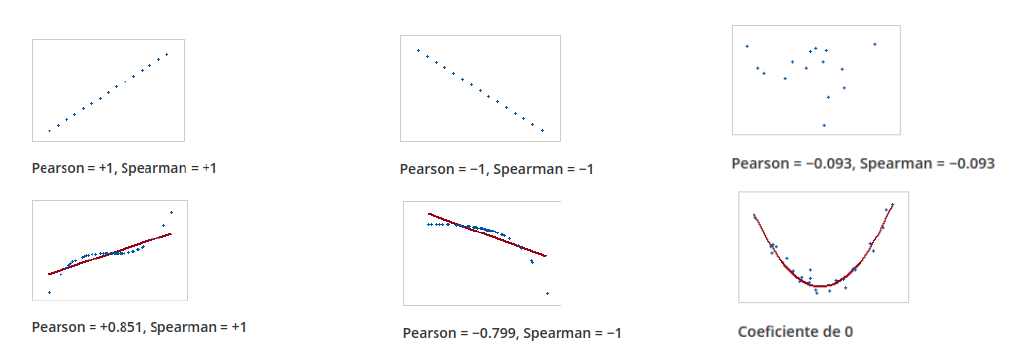

En numpy, el coeficiente de pearson se puede escribir como numpy.corrcoef(tu_array). En pandas, se puede escribir como tu_df.corr() sin especificar o como tu_df.corr(method='pearson'). Los coeficientes de correlación de Spearman se pueden escribir como tu_df.corr(method='spearman').

In [26]:
# Correlación entre variables
df.drop('Id', axis = 1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalWidthM
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.109369
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,1.000000
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.420516
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.356544
SepalWidthM,-0.109369,1.000000,-0.420516,-0.356544,1.000000


In [27]:
# Función favorita de estadística:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalWidthM
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,305.400000
std,43.445368,0.828066,0.433594,1.764420,0.763161,43.359431
min,1.000000,4.300000,2.000000,1.000000,0.100000,200.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,280.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,300.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,330.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,440.000000


# 5. Distribuciones de probabilidad

La distribución de probabilidad de una variable aleatoria es una función que asigna a cada suceso definido sobre la variable la probabilidad de que dicho suceso ocurra. 
Una distribución de probabilidad puede verse como una lista que nos proporciona todos los resultados de los valores que pueden presentarse en un acontecimiento, junto con la probabilidad de ocurrencia asociada a cada uno de estos valores.

Dicho de otra forma, **la distribución de probabilidad nos dice como se distribuyen los valores de un conjunto de datos**. Si conocemos como se distribuyen los valores de nuestro conjunto de datos, podemos intentar aproximarlo a una distribución teorica, cuyas propiedades y características son conocidas. Así, podremos realizar muchos cálculos en los datos reales utilizando hipótesis extraidas de la distribución teórica.

Aunque hay muchas distribuciones diferentes, en la practica se usan mas un pequeno número de ellas. Esto se debe a que tienen unas características matemáticas que las hace fáciles de usar, por que se asemejan bien a los datos que queremos entender, o por ambas razones. Las distribuciones estan divididas dependiendo si se usan para variables discretas o continuas. De momento, nosotros nos centraremos en la distribución normal.


## 5.1 Distribución normal

La distribución normal, tambien conocida como distribución Gaussiana, es una de las principales distribuciones, dada su repetida aparaición modelando fenómenos naturales. **Asumir que la distribución de un conjunto de datos es gaussiana, es una suposición típica antes de usar muchos algoritmos en Ciencia de datos**.

Esta distribución tiene una **forma acampanada y simétrica, centrada en la media $\hat x$, cuya dispersión viene determinada por la desviación standard $\sigma$**. Esto es una forma de decir que los datos cerca de la media apareceran de forma mas frecuente que los alejados. La función de distribución de probabilidad viene dada por:

<h1><center> $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \hat x)^2}{2\sigma^2}}$ </center></h1>


## 5.2 Visualizacion de distribuciones

Aunque los indicadores de la estadística descriptiva dan una información muy práctica, no nos dan una imagen clara de los datos con los que estamos trabajando. Por eso es importante complementarlos con la gráfica de su distribución, donde podamos ver con que frecuencia aparece cada valor. 

La representación mas común de la distribución de un set de datos es un histograma. El histograma muestra las frecuencias como un gráfico de barras que indica como de frecuentemente ocurre un determinado valor en el conjunto de datos. El eje horizontal representa los valores del conjunto de datos y el eje vertical representa la frecuencia con que esos valores ocurren.

Para visualizar datos en Python usaremos el paquete matplotlib.

## 5.3 Función de densidad

La función de densidad de probabilidad, función de densidad, o simplemente densidad de una variable aleatoria continua **describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor**.

Es decir, **relaciona cada valor con su probabilidad en lugar de su frecuencia** como hemos visto arriba. Esta función esta normalizada, de manera que el valor total de probabilidad sea 1. Una de sus ventajas es que podemos comparar varias distribuciones, sin ser confundidos por la diferencia de tamano entre muestras. 


## 5.4. Diagramas de cajas

Otra posibilidad de visualización que describe varias características importantes al mismo tiempo, tales como las medidas de centralización, la dispersión o la simetría de una distribución es el diagrama de cajas. Este diagrama consiste en una caja rectangular cuyos extremos son el cuartil Q1 y Q3, con la media o mediana como una linea en el centro. A la caja le salen dos lineas (whiskers) que marcan el valor mínimo y máximo de nuestro conjunto de datos como Q1 - 1.5 IQR y Q3 + 1.5 IQR, respectivamente (aunque estos valores se pueden reajustar), dejando todo lo que esta fuera como valores atípicos o outliers.
    
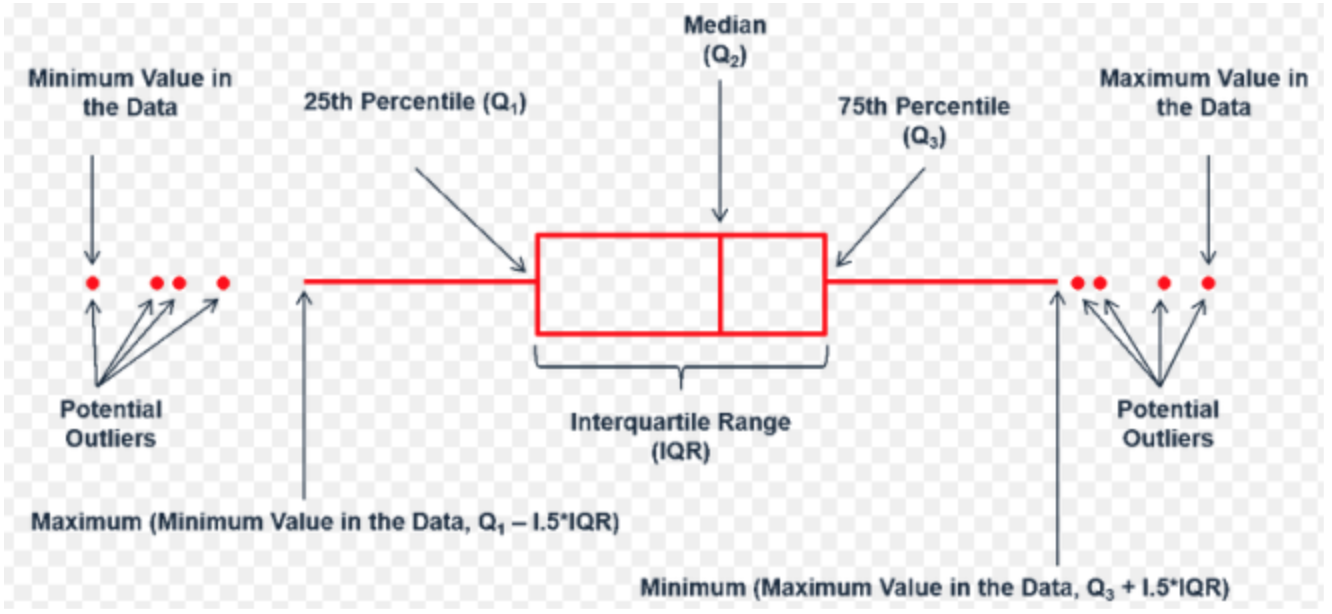




## 5.5 Distribuciones simetricas y asimetricas

Una forma de cuantificar si una distribución es simétrica es comprobar que su moda, mediana y media coinciden aproximadamente. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, la media coincide con la mediana, y también con la moda, ya que será el valor mas repetido.

Se dice que una distribución tiene asimetria a la derecha (positiva) si la cola a la derecha de la media es más larga que la de la izquierda. Esto quiere decir que los valores a la derecha estan mas separados de la media que los de la izquierda. Igualmente, se dice que una distribución tiene asimetria a la izquierda (negativa) si la cola a la izquierda de la media es más larga que la de la derecha. Es decir, que los valores a la izquierda de la media estan mas separados que los que hay a su derecha.

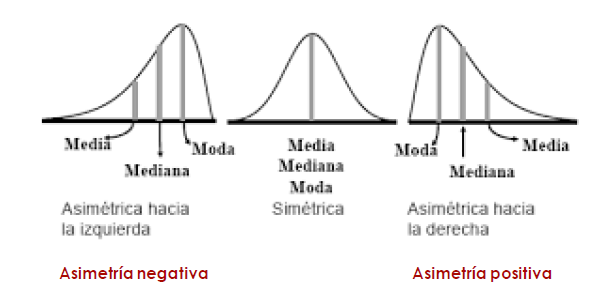

El factor de asimetría (skewness) puede ser calculado con el paquete Scipy de Python, o con .skew de Pandas (pd.DataFrame(datos).skew()).

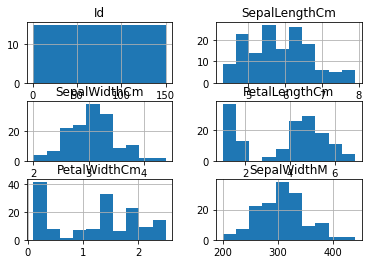

In [28]:
df.hist()
plt.show()

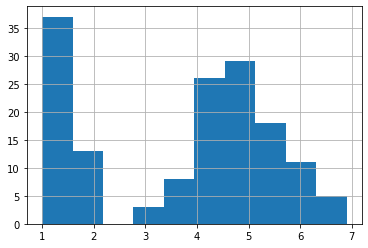

In [29]:
df['PetalLengthCm'].hist()
plt.show()

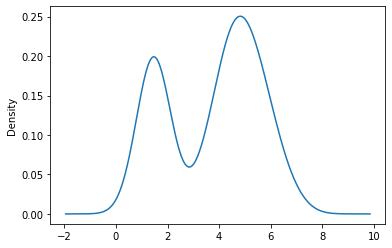

In [30]:
df['PetalLengthCm'].plot(kind='kde')
plt.show()

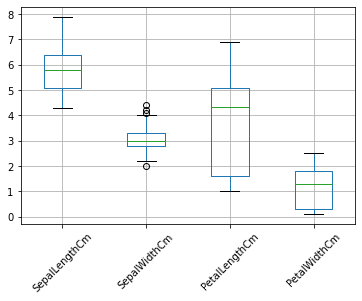

In [34]:
df = pd.read_csv('iris.csv')

# Diagramas de cajas
df.drop('Id', axis = 1).boxplot()
plt.xticks(rotation = 45)
plt.show()



In [32]:
# Asimetría
df['PetalLengthCm'].skew()

-0.27446425247378287

# Valores faltantes


En ocasiones, trabajando con sets de datos reales podemos encontrar que faltan valores, es decir, valores que no están definidos o que tienen un valor sin sentido. Esto puede ser debido a cualquier acontecimiento, como por ejemplo errores en la transcripción de los datos o a la falta de predisposición a responder a ciertas preguntas en una encuesta. 
Los valores faltantes pueden ser por tanto aleatorios o no aleatorios. Los primeros, disminuyendo el tamano de las muestras, pueden perturbar el análisis de datos. Los segundos, además, producen una disminución de la representatividad de la muestra.

Una forma habitual en la que encontraremos esto es mediante la presencia de valores NaN (Not-a-Number).


In [43]:
import numpy as np

# dataframe 1
df1 = pd.DataFrame([
    ['1','Estudio', '?', 39],
    ['2','Apartamento', np.nan, 65],
    ['3','Estudio', np.nan, 41],
    ['4',np.nan, 3, 120],
    ['5','Estudio', 1, np.nan],
    ['-','Apartamento', 2, 70],
    ['7','Apartamento', 3, np.nan],
    ['8','Apartamento', 4, 90],
    ['9','Casa de campo', 5, 122], 
    ['10','Estudio', 1, 25],
    ['11','Estudio', 1, 27],
    ['12', 'Nave industrial', 1, 150],
    ['13','Casa de campo', 4, 95], 
    ['14', 'Nave industrial', 1, 130],
    ['15','Estudio', 1, np.nan]],
    columns=['id', 'Inmueble', 'Habitaciones', 'metros cuadrados'])


df1.head(7)

,id,Inmueble,Habitaciones,metros cuadrados
0,1,Estudio,?,39.0
1,2,Apartamento,NaN,65.0
2,3,Estudio,NaN,41.0
3,4,NaN,3,120.0
4,5,Estudio,1,NaN
5,-,Apartamento,2,70.0
6,7,Apartamento,3,NaN


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15 non-null     object 
 1   Inmueble          14 non-null     object 
 2   Habitaciones      13 non-null     object 
 3   metros cuadrados  12 non-null     float64
dtypes: float64(1), object(3)
memory usage: 608.0+ bytes


O podemos utilizar la función isnull(). ( Nota: Ojo que isnull() busca NaN, no ceros).


In [37]:
df1.isnull().sum()

id                  0
Inmueble            1
Habitaciones        2
metros cuadrados    3
dtype: int64

In [38]:
df1.replace('?', np.nan, inplace = True)
df1.head(3)

,id,Inmueble,Habitaciones,metros cuadrados
0,1,Estudio,NaN,39.0
1,2,Apartamento,NaN,65.0
2,3,Estudio,NaN,41.0


Como podemos trabajar entonces con valores faltantes? Hay varias opciones:

    Descarte:
    1.1 Eliminar las columnas que contienen valores faltantes
    1.2 Eliminar las filas que contienen valores faltantes
    Imputación
    1.3 Rellenar los valores faltantes

dejarlos tal cual y asegurarnos de que cuando hagamos calculos con las filas o columnas que los contengan, no serán tomados en cuenta.

1) Descarte de valores faltantes

1.1) Podemos eliminar que continen valores faltantes, pero este es un caso muy extremo y solo podría convenir con las columnas que tienen muchos valores faltantes.


In [39]:
updated_df = df1.dropna(axis=1)
updated_df.head()

,id
0,1
1,2
2,3
3,4
4,5


1.2) Si tenemos muchas filas, y comprobamos que no va a afectar a la representatividad de la muestra, podemos eliminar las filas que contienen NaN:

In [40]:
updated_df = df1.dropna(axis=0)
updated_df.head()

,id,Inmueble,Habitaciones,metros cuadrados
5,-,Apartamento,2.0,70.0
7,8,Apartamento,4.0,90.0
8,9,Casa de campo,5.0,122.0
9,10,Estudio,1.0,25.0
10,11,Estudio,1.0,27.0


### 1.3) Imputación de valores faltantes

Una razón para imputar datos faltantes es que hay modelos de aprendizaje automático que probablemente quieras usar que te devolverán un error si les pasas valores NaN.

La forma mas sencilla de solucionar esto con imputación, sería darles un valor concreto, como por ejemplo 0. Sin embargo, esto puede reducir el accuracy de tu modelo de forma significativa. Hay por tanto varias opciones para imputar valores:

Si el valor faltante corresponde a una variable numérica:
- Rellenar los valores faltantes con 0 o -9, o cualquier valor que no fuese a aparecer en el set de datos. Esto puede hacerse de manera que la máquina reconozca que el dato no es real.
- Rellenar los valores faltantes con la media o mediana de los demás valores de la fila / columna.

Si el valor faltante corresponde a una variable categórica:
- Rellenar los valores faltantes con la moda.
- Rellenar valores faltantes con un nuevo tipo.

Una herramienta muy útila para esto es .fillna().

In [44]:
updated_df['Habitaciones'] = updated_df['Habitaciones'].fillna(updated_df['Habitaciones'].mean())
updated_df

,id,Inmueble,Habitaciones,metros cuadrados
5,-,Apartamento,2.0,70.0
7,8,Apartamento,4.0,90.0
8,9,Casa de campo,5.0,122.0
9,10,Estudio,1.0,25.0
10,11,Estudio,1.0,27.0
11,12,Nave industrial,1.0,150.0
12,13,Casa de campo,4.0,95.0
13,14,Nave industrial,1.0,130.0


In [45]:
updated_df['Habitaciones'].fillna(updated_df['Habitaciones'].mean())

5     2.0
7     4.0
8     5.0
9     1.0
10    1.0
11    1.0
12    4.0
13    1.0
Name: Habitaciones, dtype: float64

# Encoding - Codificación


En muchas actividades de aprendizaje automático o ciencia de datos, el conjunto de datos puede contener texto o valores categóricos. Por ejemplo, la función de color tiene valores como rojo, naranja, azul, blanco, etc. El plan de comidas tiene valores como desayuno, almuerzo, merienda, cena, etc. 
Sin embargo, **la mayoría de algoritmos de aprendizaje automático esperan valores numéricos**. Cuando trabajemos con variables categóricas tendremos, entonces, que convertilas a variables numéricas. 

**Hay muchas formas de convertir valores categóricos en valores numéricos**. Cada enfoque tiene sus propios puntos fuertes y débiles. En este curso, trabajaremos con dos modelos: One-Hot-Encoding y Label-Encoder. Ambos codificadores son parte de la biblioteca SciKit-learn y se utilizan para convertir texto o datos categóricos en datos numéricos.

## Label encoding

Este enfoque es muy simple e implica convertir cada valor de una columna en un número. Por ejemplo, asignará un número a cada color, y un número a cada nivel.

## One hot encoding

Para las variables categóricas donde no existe una relación ordinal, la codificación de números enteros puede no ser suficiente, o incluso dañina para el modelo, en el peor de los casos.

Dicho de otra manera, forzar una relación ordinal a través de una codificación ordinal y permitir que el modelo asuma un ordenamiento natural entre categorías puede generar un rendimiento deficiente o resultados inesperados ( como predicciones a mitad de camino entre categorías).

Una solución sería aplicar una codificación one-hot a la representación ordinal. Aquí es donde se elimina la variable codificada entera y se agrega una nueva variable binaria para cada valor en la variable.

Por ejemplo, en el caso de la variable color hay tres categorías. Por lo tanto, se necesitan tres variables binarias. Se coloca un valor "1" en la variable binaria para el color y valores "0" para los otros colores.

Esta transformación de codificación one-hot está disponible en la biblioteca de aprendizaje automático de Python de scikit-learn a través de la clase OneHotEncoder.

En este caso, las categorias se ordenan alfanuméricamente.

In [46]:
df_with_dummies_drop_first = pd.get_dummies(updated_df['Inmueble'], drop_first=True)
df_with_dummies_drop_first

,Casa de campo,Estudio,Nave industrial
5,0,0,0
7,0,0,0
8,1,0,0
9,0,1,0
10,0,1,0
11,0,0,1
12,1,0,0
13,0,0,1


# 1. Transformaciones de variables

En esta clase intentaremos explicar la **diferencia entre escalar y estandarizar** una variable.  

Aviso: Junto con normalizar, escalar y estandarizar a veces se usan indistintamente. Sin embargo, aunque parecidas, no son los mismo!

Tanto al escalar como al estandarizar una variable, **se están transformando sus valores para que una vez transformados tengan propiedades útiles específicas**. Estas propiedades se pueden aprovechar para crear mejores características y modelos.

## .1. Escalado

Escalar significa cambiar la escala de un conjunto de datos, es decir, **cambiar el rango de valores del conjunto de datos, para que se ajusten a una escala específica**, como 0 a 1, o 0 a 100. Por ejemplo, es posible escalar un rango de edades de 15 a 35 hasta un rango de 0 a 1. Sin embargo, su forma (o distribución) no cambia.

**Una disparidad en la escala puede frenar o incluso impedir la convergencia de los modelos basados en gradientes**. Esta disparidad también se convierte en un problema importante para los algoritmos que utilizan la distancia euclidiana entre dos puntos de datos en sus cálculos. Por ejemplo, al usar support vector machines (SVM) o algoritmos de clustering o agrupamiento como k nearest neighbours (KNN).

### Escalado de máximo absoluto

El escalado de máximo absoluto consiste en dividir todos los valores del conjunto de datos por el valor máximo para esa variable. Los valores resultantes estarán entonces entre el cero y el uno.


<h1><center>  $\hat X_i = \frac{X_i}{X_{max}}  $ </center></h1>

### Escalado de mínimo-máximo

El escalado de mínimo-máximo consiste en restar el mínimo de todos los valores del conjunto de datos y dividirlo por el valor máximo menos el mínimo para esa variable. Los valores resultantes estarán entonces entre el cero y el uno.


<h1><center>  $\hat X_i = \frac{X_i - X_{min}}{X_{max}-X_{min}}  $ </center></h1>

### Escalado de z-score (unidad tipificada)

Este tipo de escalado fué introducido en la clase anterior en el contexto de detección de outliers. 

Recordamos que el valor z de un elemento de una distribución normal viene definido como

<h1><center>  $ Z = \frac{x_i - \mu}{\sigma} $ </center></h1>

Es decir, dadas la media y la desviación estandard de una distribución, **el valor Z de un elemento nos dice como de lejos de la media esta un valor en unidades de std**. 



## .2. Estandarizado 

La estandarización es una transformación más radical. Consiste en **cambiar los valores de los datos para que puedan describirse como una distribución normal**.

Repaso: Una distribuón Normal o Gaussiana es la distribución estadística donde las observaciones aproximadamente iguales caen por encima y por debajo de la media. La media y la mediana son aproximadamente iguales. Tiene forma de campana, es decir, hay más observaciones en torno a la media que en torno a los extremos.

Dicho de otra manera, estandarizar significa cambiar los valores de los datos para que la desviación estándar de los datos sea igual a 1 (varianza unitaria). Esto a menudo va de la mano con la eliminación de la media de la distribución (estableciendo la media = 0). Así se tiende a cambiar la forma de los datos hacia la forma de una distribución normal. Los datos a menudo se escalan implícitamente cuando se estandarizan.

Si se va a utilizar una técnica de aprendizaje automático o de estadística que asume que los datos a estudiar se distribuyen siguiendo una curva gaussiana, **combiene que los datos esten estandarizados (o normalizados)**. 

En general, **los modelos de aprendizaje automático funcionan mejor cuando las caracteristicas siguen una distribución aproximadamente normal y sus escalas son similares**.


### Estandarización de Box-Cox


Uno de los métodos de transformación de variables es la llamada transformación de Box-Cox. 

Esta transformación busca el valor de lambda para el que la distribución transformada está más cercana a la
distribución normal:<br>
• Si lambda = 0, se aplica transformación logarítmica. <br>
• Si lambda = ½, se aplica una raíz cuadrada. <br>
• Si lambda = -1, se aplica una transformación 1/x. <br>

X tilde corresponde a la media geométrica de la variable x.



Dicho de otra manera, esta transformación consiste en considerar todos los valores del exponente λ (que varia de -5 a 5) y seleccionar su valor óptimo que consigue la mejor aproximación a una curva de distribución gaussiana.

Esta transformación sólo acepta x positivas. Tenemos alternativas como la transformación de Yeo-Johnson.


En muchas situaciones, ya sea en análisis de datos o en preprocesado de
datos, necesitaremos aplicar transformaciones a las variables para que
presenten una distribución más parecida a la distribución normal. Aquí tenemos algunos otros ejemplos.

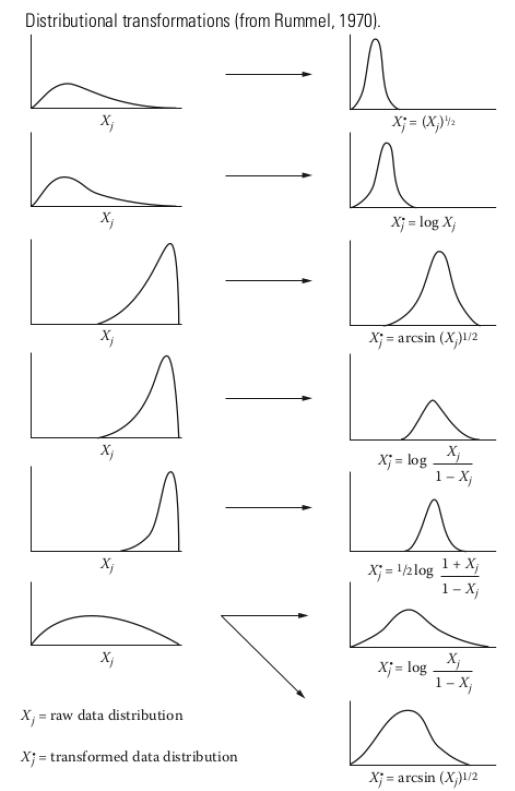

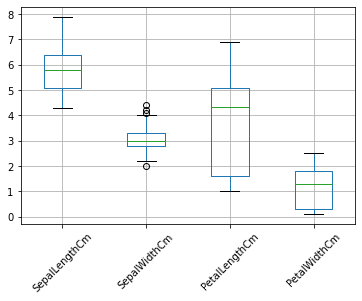

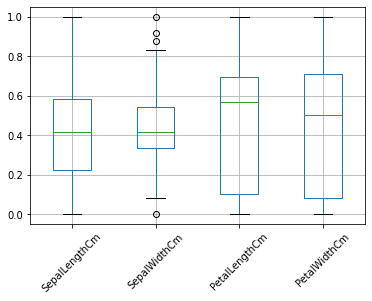

In [47]:
df = pd.read_csv('iris.csv')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_MMscaled = df.copy()

variables_lista = ['Id','SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
df_MMscaled[variables_lista] = scaler.fit_transform(df[variables_lista])


df.drop('Id', axis = 1).boxplot()
plt.xticks(rotation= 45)
plt.show()

df_MMscaled.drop('Id', axis = 1).boxplot()
plt.xticks(rotation= 45)
plt.show()

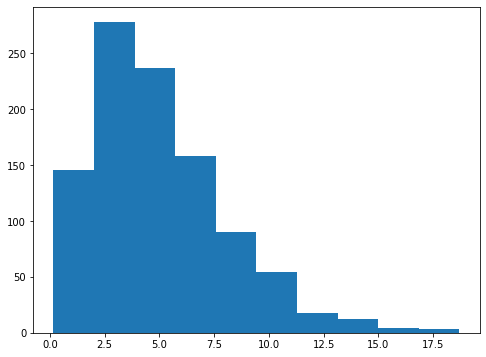

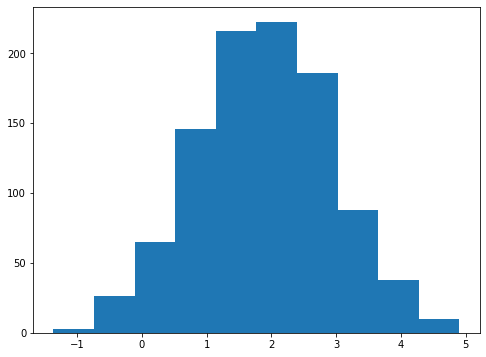

In [48]:
# boxcox
import numpy as np

from scipy import stats
shape, scale = 2.5, 2.
x = np.random.gamma(shape, scale, 1000)

plt.figure(figsize=(8,6))
plt.hist(x)
plt.show()

xt, lmbda = stats.boxcox(x)

plt.figure(figsize=(8,6))
plt.hist(xt)
plt.show()


## Outliers

Un outlier o **valor atípico es una observación que se desvía mucho de otras observaciones** y despierta sospechas de ser generada por un mecanismo diferente. Su presencia **tiene efectos de distorsión en valores como la media**, varianza o correlaciones entre variables.


### Tipos de outliers
    
Debido a su naturaleza, los outliers pueden ser de diversos tipos

- Outliers puntuales: Datos que se encuentran lejos del resto de la distribución.
- Outliers contextuales: Por ejemplo encontrar texto en una variable numérica.
- Outliers colectivos: Subconjuntos de novedades en los datos. Esto podría significar una señal que puede indicar el descubrimiento de un nuevo fenómeno.


### Causas típicas:

Las causas más comunes de la aparición de outliers son
- Errores de introducción de datos, normalmente errores humanos.
- Errores instrumentales que afectan a la medición de datos (instrumento defectuoso).

- Errores experimentales de planificación y/o ejecución

- Errores de procesamiento de datos, manipulación de datos y aparición de mutaciones no intencionadas
- Errores de muestreo, al extraer o mezclar conjunto de datos de fuentes erróneas o fuentes múltiples
- Errores naturales o novedades en los datos que no se habían detectado hasta ahora


## Detección de outliers

Aunque la detección de outliers forma parte de la Estadística Descriptiva, algunos métodos pueden requerir técnicas analíticas y gráficos mas sofisticados. Vamos a ver los métodos mas sencillos.


### Método de la desviación standard y de unidades tipificadas (z-scores)

Si sabemos que nuestra distribución de valores es Gaussiana o parecida, podemos usar la desviación standard de la muestra como límite para identificar valores atípicos.

La distribución gaussiana tiene la propiedad de que su desviación standard de la media puede ser usada para resumir el porcentaje de valores en la muestra. Por ejemplo, en el rango de una desviación standard de la muestra, es decir, en el rango $\mu - \sigma$ a $\mu + \sigma$ encontramos el 68% de la muestra. En resumen

- 1 Standard Deviation from the Mean: 68%
- 2 Standard Deviations from the Mean: 95%
- 3 Standard Deviations from the Mean: 99.7%

Vamos a comprobar esto con nuestra distribución de ejemplo.

### Método del valor z ó unidad tipificada
Una forma práctica de aplicar esto para la detección de outliers es haciendo uso del z-score (valor z o unidad tipificada). El valor z de un elemento de una distribución normal viene definido como

<h1><center>  $ Z = \frac{x_i - \mu}{\sigma} $ </center></h1>

Es decir, dadas la media y la desviación estandard de una distribución, **el valor Z de un elemento nos dice como de lejos de la media esta un valor en unidades de std**. A partir de aquí es sencillo detectar como outlier todos los valores Z que esten por encima de un número de desviaciones estandard dadas (un límite típico es $3\sigma$).

### Método del rango intercuartil

No todos los datos tienen una distribución normal o lo suficientemente normal como para tratarlos como extraídos de una distribución gaussiana.

El rango intercuartílico (IQR) es una buena medida para resumir una muestra de datos de distribución no gaussiana.

Como vimos en clases anteriores, el IQR se calcula como la diferencia entre los percentiles 75 y 25 de los datos y define la caja en un diagrama de caja y bigotes.

El IQR se puede utilizar para identificar valores atípicos definiendo límites en los valores de la muestra que son un factor dado F del IQR por debajo del percentil 25 o por encima del percentil 75. Normalmente, por defecto, se usa un valor de 1.5 para el factor F. F = 3 se puede usar para identificar valores atípicos extremos o "alejados".



## Tratamiento de outliers

Una vez detectados los outliers, tenemos que decidir que hacer con ellos. Hay varias opciones:

1. Mantener los valores atípicos
2. Eliminación
3. Imputación
4. Transformación

En cualquier caso, es importante inspeccionar los valores atípicos encontrados para intentar dilucidar su origen. Con un poco de suerte, podremos obtener información para decidir que hacer con ellos.

### Mantener los valores atípicos
Puede darse el caso de que los valores, aunque atípicos, sean correctos, y a demás sean importantes para la conclusión a la que haya que llegar, por lo tanto se deben mantener.

### Eliminación

Si entendemos que los valores atípicos se deben a un error a la hora de introducirlos en la base de datos o que hay muy pocos con respecto al número total, estos pueden ser eliminados.

Sin embargo, si la presencia de los valores atípicos no se debe a un error, eliminarlos no es la solución, ya que introduce un sesgo.

### Transformación
Transformar todo el conjunto de datos tambien puede dar lugar a la eliminación de outliers, no porque estos se quiten del dataset si no porque ya no se verán como tal. Para esto hay diferentes opciones:

1. Escalado de valores
2. Normalización
3. Transformación logaritmica
4. Transformación de Box-Cox

Esta técnica convierte la distribución en normal. Aunque no da los mejores resultados, no reesulta en pérdida de datos. Veremos esto en mas detalle en otra clase.

### Imputación
Como en el caso de valores faltantes, también podemos imputar outliers. Se puede usar la media, la mediana, el valor cero, etc. Quizá la posibilidad mas interesante sería usar la mediana, ya que no se ve afectada por los outliers.


# Train-test split

En el contexto de preparación de datos para su aplicación en modelos de Machine Learning, necesitaremos cumplir con la metodología  propia de Machine Learning. Uno de los aspectos básicos de esta metodología es dividir el conjunto de datos de los que disponemos en un conjunto de entrenamiento y en un conjunto de test.

Todo el entrenamiento del modelo, ajuste de hiperparámetros y pruebas de preprocesado de datos se deben hacer y evaluar en el conjunto de entrenamiento.

El conjunto de test lo utilizaremos para, una vez elegido y entrenado el modelo, elegidos los hiperparámetros y elegidos y entrenados los pasos de preprocesado, obtener una estimación de cómo se comportaría ese pipeline frente a datos desconocidos del mundo real.

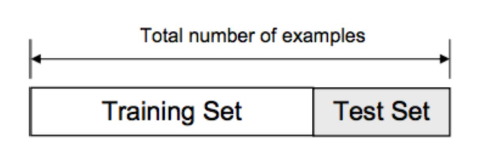

En scikit-learn, podemos llamar a la función train_test_split.




# Cross validation

Para poder ajustar hiperparámetros y decidir entre distintos
tipos de preprocesado, necesitaremos definir un conjunto de
validación dentro del conjunto original de entrenamiento
Para tener una estadística más completa, podemos repetir el
entrenamiento varias veces, definiendo cada vez un conjunto
de validación diferente. 
A esto se le conoce como cross validation, que entra dentro
de las técnicas de remuestreo (resampling methods)

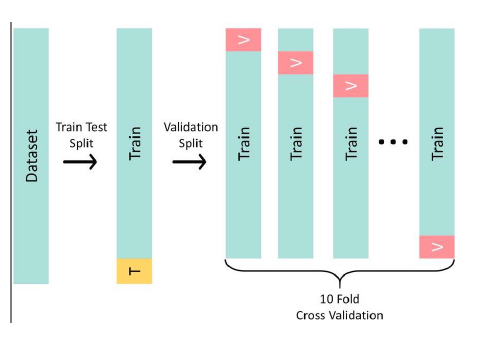

En Python, podemos aplicar cross validation usando el método cross_val_score de scikit-learn
Este método necesita como entrada el modelo que se va a utilizar, los valores de X_train e y_train y el número de veces que se va a repetir el entrenamiento usando conjuntos de validación diferentes
Devuelve los valores de la métrica en cada conjunto de validación

# Pipelines

Desde la perspectiva de la preparación de datos, será necesario estructurar las transformaciones
de datos en Pipelines. 
Estos Pipelines garantizan que la información del conjunto de validación no se tomará en cuenta a la hora de definir
las transformaciones y entrenar el modelo.
Pipeline nos ofrecerá una forma compacta de manejar modelos y transformaciones para aplicarlos directamente a
los datos que queremos predecir.


Por ejemplo, podemos introducir en el Pipeline el método PowerTransformer de scikit-learn para aplicar transformaciones de Box-Cox a las variables del problema.

Una vez que  ya hemos seleccionado hiperparámetros y preprocesados y los hemos comparado a través de cross validations,
podemos entrenar el Pipeline con el conjunto de entrenamiento completo y realizar la predicción sobre el conjunto
de test usando el método predict

# Procesamiento de textos

En esta sección introduciremos los pasos básicos típicos del procesamiento de textos. Estos pasos de procesamiento de datos textuales son necesarios para transferir texto del lenguaje humano a un formato legible por una máquina para su posterior procesamiento y uso con algoritmos de aprendizaje automático. Los pasos de preprocesamiento de un problema dependen principalmente del problema en sí, por lo que no es necesario aplicar todos los pasos a todos los problemas.
Para ello, usaremos la biblioteca NLTK (Natural Language Toolkit).

Algunos pasos:

1. Convertir texto a minúsculas <br>
2. Eliminar o convertir números <br>
3. Eliminar la puntuación <br>
4. Eliminar espacios en blanco <br>
5. Reemplazar patrones <br>

## Tokenización 

La tokenización es el proceso de dividir un texto en las unidades más pequeñas que tengan significado, por ejemplo en palabras. A estas unidades mínimas con significado las denominaremos tokens. En castellano esta división se realiza mediante espacios o signos de puntuación, pero existen idiomas como el Alemán, el Euskera o el Japonés donde se agrupan las palabras, y esta tarea es mucho más complicada.

## Eliminar stopwords:

Las palabras stopwords son palabras que no contribuyen al significado de una oración. Por lo tanto, pueden eliminarse con seguridad sin causar ningún cambio en el significado de la oración. La biblioteca NLTK tiene un conjunto de palabras vacías y podemos usarlas para eliminar palabras vacías de nuestro texto y devolver una lista de tokens de palabras.

## Stemming: Reducir las palabras a su raíz.

Stemming es el proceso de obtener la raíz de una palabra. La raíz es la parte a la que se le añaden los afijos flexivos en ingles (-ed, -ize, -de, -s, etc.). La raíz de una palabra se crea eliminando el prefijo o el sufijo de una palabra. Por lo tanto, derivar una palabra puede no resultar en palabras reales.

Análogamente, en castellano, wl stemming consiste en sustituir cada palabra por su forma más básica, eliminando
prefijos, sufijos, etc...

Ejemplo: <br>
books      --->    book <br>
looked     --->    look <br>
denied     --->    deni <br>
flies      --->    fli <br>

 
Si el texto no está en tokens, entonces debemos convertirlo en tokens. Una vez que hemos convertido las cadenas de texto en tokens, podemos convertir la palabra tokens en su forma de raíz. Existen principalmente tres algoritmos para la lematización. Estos son el Porter Stemmer, el Snowball Stemmer y el Lancaster Stemmer. Porter Stemmer es el más común entre ellos.

## Lematización:

La lematización tiene el mismo objetivo que el stemming (convertir una palabra a su raíz) solo que de forma más correcta desde el punto de vista lingüístico (sustituye cada palabra por su lema, es decir, la raíz pertenece al idioma). Aunque da mejores resultados, la lematización es mucho más lenta ya que requiere el análisis sintáctico de cada oración.

## Bag of words

Para trabajar con lenguaje natural necesitaremos poder traducir el texto a algo que pueda ser entendido por los algoritmos
predictivos, es decir, traducir las unidades de significado (letras, palabras, conjuntos de palabras) a formato numérico.
Si trabajamos con palabras, una primera idea sería asignar a cada palabra un número. A esto se le llama vectorizar y funciona de forma parecida a one-hot encoding.

El modelo bolsa de palabras (o bag-of-words) crea un vector para cada instancia sumando todas las palabras que aparecen en el texto de cada instancia.


Lectura recomendada:
    
https://medium.com/@joseperezaguera/some-basic-statistical-techniques-for-product-managers-250a02586453

Contacto:
    
    Jorge Luis Hita (Coordinador): linkedin.com/in/jorge-luis-hita-54b80055
    Nicolás Coca López: https://www.linkedin.com/in/nicolascocalopez/